In [1]:
import pandas as pd
import sqlite3

# Step 1: Connect to the SQLite database (or create it)
conn = sqlite3.connect('trabalhodois.db')
cursor = conn.cursor()

# Step 2: Execute the script to create tables

cursor.executescript("""
CREATE TABLE REGIAO (
	COD_REGIONAL INT PRIMARY KEY, 
	DESC_REGIONAL VARCHAR(255)
);

CREATE TABLE ACIDENTE (
	TIPO_ACIDENTE VARCHAR(255)PRIMARY KEY, 
	DESC_TIPO_ACIDENTE VARCHAR(255)
);

CREATE TABLE OCORRENCIA (
	NUMERO_BOLETIM VARCHAR(255) PRIMARY KEY, 
	DATAHORA_BOLETIM TIMESTAMP,
	TIPO_ACIDENTE VARCHAR(255),
	COD_TEMPO INT,
	DESC_TEMPO VARCHAR(255),
	COD_PAVIMENTO INT,
	PAVIMENTO VARCHAR(255),
	COD_REGIONAL INT,
	LOCAL_SINALIZADO VARCHAR(255),
	VELOCIDADE_PERMITIDA INT,
	FOREIGN KEY (TIPO_ACIDENTE) REFERENCES ACIDENTE(TIPO_ACIDENTE),
	FOREIGN KEY (COD_REGIONAL) REFERENCES REGIAO(COD_REGIONAL)
);

CREATE TABLE ENVOLVIDOS (
	N_BOLETIM VARCHAR(255) PRIMARY KEY, 
	N_ENVOLVIDO INT,
	COD_SEVERIDADE INT,
	DESC_SEVERIDADE VARCHAR(255),
	SEXO VARCHAR(255),
	CINTO_SEGURANCA VARCHAR(255),
	EMBREAGUES VARCHAR(255),
	IDADE INT,
	CATEGORIA_HABILITACAO VARCHAR(255),
	DESCRICAO_HABILITACAO VARCHAR(255),
	ESPECIE_VEICULO VARCHAR(255),
	FOREIGN KEY (N_BOLETIM) REFERENCES OCORRENCIA(NUMERO_BOLETIM)
);

CREATE TABLE VEICULOS (
	N_BOLETIM VARCHAR(255) PRIMARY KEY, 
	SEQ_VEIC INT,
	COD_CATEG INT,
	DESCRICAO_CATEG VARCHAR(255),
	COD_ESPECIE INT,
	DESCRICAO_ESPECIE VARCHAR(255),
	COD_SITUACAO INT,
	DESCRICAO_SITUACAO VARCHAR(255),
	TIPO_SOCORRO INT,
	DESC_TIPO_SOCORRO VARCHAR(255),
	FOREIGN KEY (N_BOLETIM) REFERENCES OCORRENCIA(NUMERO_BOLETIM)
);
""")



In [2]:
import csv

with open('C:/Users/franc/Documents/bd/TabelasFinais/ACIDENTES.csv', newline='', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=';')
    
    # Skip the header row
    next(csvreader)
    
    # Insert rows into the table
    for row in csvreader:
        cursor.execute('''
            INSERT INTO ACIDENTE (TIPO_ACIDENTE, DESC_TIPO_ACIDENTE)
            VALUES (?, ?)
        ''', row)



In [3]:

envolvidos = pd.read_csv('C:/Users/franc/Documents/bd/TabelasFinais/ENVOLVIDOS.csv')
envolvidos.to_sql('ENVOLVIDOS', conn, if_exists='append', index=False)


23457

In [4]:

with open('C:/Users/franc/Documents/bd/TabelasFinais/OCORRENCIAS.csv', newline='', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=';')
    
    # Skip the header row
    next(csvreader)
    
    # Insert rows into the table
    for row in csvreader:
        cursor.execute('''
            INSERT INTO OCORRENCIA (NUMERO_BOLETIM, DATAHORA_BOLETIM, TIPO_ACIDENTE, COD_TEMPO, DESC_TEMPO, COD_PAVIMENTO, PAVIMENTO, COD_REGIONAL, LOCAL_SINALIZADO, VELOCIDADE_PERMITIDA)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', row)

        


In [5]:

with open('C:/Users/franc/Documents/bd/TabelasFinais/REGIAO.csv', newline='', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=';')
    
    # Skip the header row
    next(csvreader)
    
    # Insert rows into the table
    for row in csvreader:
        cursor.execute('''
            INSERT INTO REGIAO (COD_REGIONAL, DESC_REGIONAL)
            VALUES (?, ?)
        ''', row)


In [6]:


veiculos = pd.read_csv('C:/Users/franc/Documents/bd/TabelasFinais/VEICULOS.csv')
veiculos.to_sql('VEICULOS', conn, if_exists='append', index=False)




12209

In [46]:
query = """
        SELECT PAVIMENTO, COUNT(NUMERO_BOLETIM)
        FROM OCORRENCIA 
        GROUP BY PAVIMENTO
        """

cursor.execute(query)
A = cursor.fetchall()
for row in A:
    print(row)

column_names = ['Tipo de acidente', 'Acidentes']

df = pd.DataFrame(A, columns=column_names)


('ASFALTO', 31834)
('CALCAMENTO', 206)
('CONCRETO', 214)
('NAOINFORMADO', 35973)
('TERRA', 9)


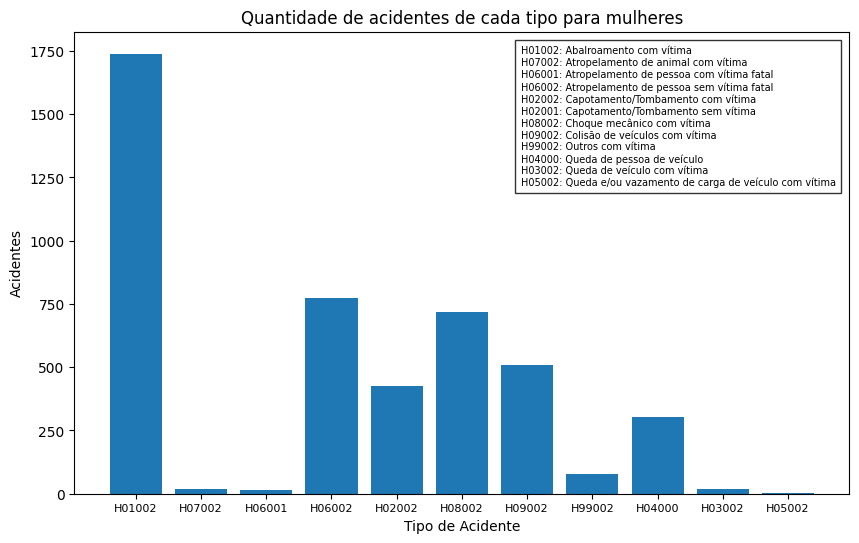

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df['Tipo de acidente'], df['Acidentes'])  # Replace with your actual column names
plt.xlabel('Tipo de Acidente')  # Replace with your actual label
plt.ylabel('Acidentes')  # Replace with your actual label
plt.title('Quantidade de acidentes de cada tipo para mulheres')  # Replace with your actual title
plt.xticks(fontsize=8)  # You can change 10 to any size you prefer

explanation_text = (
    "H01002: Abalroamento com vítima\n"
    "H07002: Atropelamento de animal com vítima\n"
    "H06001: Atropelamento de pessoa com vítima fatal\n"
    "H06002: Atropelamento de pessoa sem vítima fatal\n"
    "H02002: Capotamento/Tombamento com vítima\n"
    "H02001: Capotamento/Tombamento sem vítima\n"
    "H08002: Choque mecânico com vítima\n"
    "H09002: Colisão de veículos com vítima\n"
    "H99002: Outros com vítima\n"
    "H04000: Queda de pessoa de veículo\n"
    "H03002: Queda de veículo com vítima\n"
    "H05002: Queda e/ou vazamento de carga de veículo com vítima"
)

plt.text(5.9, max(df['Acidentes']) * 0.7, explanation_text,
         fontsize=7, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

In [ ]:
conn.close()